In [1]:
import numpy as np
import pandas as pd

data= pd.read_csv("data.csv")
data.drop(["id" , "Unnamed: 32"], axis=1, inplace= True)


In [2]:
data.diagnosis= [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [3]:
# Normalization

x=  (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [4]:
# Train ve Test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.15, random_state= 42)


In [5]:
# Decision Tree 

from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("score:", dt.score(x_test, y_test))

score: 0.9069767441860465


In [6]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(x_train, y_train)
print("random forest:", rf.score(x_test, y_test))


y_pred= rf.predict(x_test)
y_true= y_test

random forest: 0.9534883720930233


In [7]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=y_true,y_pred=y_pred)


Text(24.0, 0.5, 'y_true')

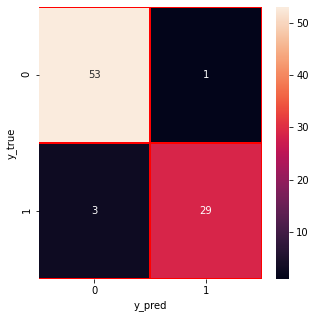

In [8]:
# Cm visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot= True, linewidths= 0.5, linecolor="red", fmt= ".0f", ax= ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")